<a href="https://colab.research.google.com/github/aragakerubo/cis635-homework-assignments/blob/main/Hilda_Ogamba_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: Classification and Model Evaluation

## Introduction  

In this assignment, you will implement and evaluate multiple algorithms to classify the Pima Indians Diabetes Dataset. Using **5-fold stratified cross-validation**, you will calculate metrics such as **Accuracy**, **F1 Score (weighted)**, and **AUC-ROC (weighted)**. Additionally, you will perform **hyperparameter tuning** for certain algorithms to improve their performance and visualize the **ROC curves** for all classifiers. If class imbalance is identified, you will handle it using appropriate methods.  

- The target feature is Outcome, which indicates whether a patient has diabetes (1) or not (0).
---

## Objectives  

- Train and evaluate **Decision Tree**, **Logistic Regression**, **Gaussian Naive Bayes**, and **K-Nearest Neighbors (KNN, n=5)** classifiers using 5-fold stratified cross-validation.  
- Perform **grid search hyperparameter tuning** for Decision Tree, Logistic Regression, and KNN classifiers.  
- Compute and display the **average** and **standard deviation** of performance metrics: Accuracy, F1 Score (weighted), and AUC-ROC (weighted).  
- Plot and compare the **ROC curves** for all classifiers.  

---

## Instructions  

1 . Grid Search with Cross-Validation (for Hyperparameter Tuning):

  - Perform **grid search** hyperparameter tuning for [**Decision Tree**](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [**Logistic Regression**](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html), and [**KNN**](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) using [**scikit-learn's GridSearchCV**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Explore key hyperparameters that affect model performance.
  - The cv argument in GridSearchCV ensures that the best hyperparameters are chosen based on robust cross-validation.

3. **Evaluation with Cross-Validation**:  
   - Train the models using the **best hyperparameters** from the grid search.  
   - Perform [5-fold stratified cross-validation](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.StratifiedKFold.html)(a separate cross-validation) for each model and compute the following metrics:  
     - Accuracy  
     - F1 Score (weighted)  
     - AUC-ROC (weighted)  

4. **Visualization**:  
   - Plot the [**ROC curves**](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.roc_curve.html) for all models on a single figure for comparison. Include a legend, axis labels, and a title.  

5. **Report Results**:  
   - Create a table showing the **average** and **standard deviation** of the performance metrics for all models.  
   - Include a second table listing the best hyperparameters for each model.  
   - Discuss the performance differences between the models, highlighting the impact of hyperparameter tuning and any class imbalance handling.  

---

## Expected Output  

### Table of Metrics:  

| Classifier              | Accuracy (mean ± std) | F1 Score (mean ± std) | AUC-ROC (mean ± std) |  
|-------------------------|-----------------------|-----------------------|----------------------|  
| Decision Tree           | x.xxx ± x.xxx        | x.xxx ± x.xxx        | x.xxx ± x.xxx        |  
| Logistic Regression     | x.xxx ± x.xxx        | x.xxx ± x.xxx        | x.xxx ± x.xxx        |  
| Gaussian Naive Bayes    | x.xxx ± x.xxx        | x.xxx ± x.xxx        | x.xxx ± x.xxx        |  
| KNN                     | x.xxx ± x.xxx        | x.xxx ± x.xxx        | x.xxx ± x.xxx        |  

### Table of Best Hyperparameters:  

| Classifier              | Best Hyperparameters                   |  
|-------------------------|-----------------------------------------|  
| Decision Tree           | `max_depth=...`, `min_samples_split=...` |  
| Logistic Regression     | `C=...`                                |  
| KNN                     | `n_neighbors=...`, `weights=...`       |  

### ROC Curve:  
- A single figure comparing the ROC curves for all models using the tuned hyperparameters.

---

## Grading Criteria  

- **Data Preparation (15 points)**: Address missing values and handle class imbalance appropriately.  
- **Implementation (40 points)**: Correctly implement grid search, cross-validation, and performance evaluation for all classifiers.  
- **Visualization (15 points)**: Generate and label the ROC curves clearly and correctly.  
- **Results and Analysis (20 points)**: Present the evaluation metrics and discuss findings effectively, including the impact of hyperparameter tuning and class imbalance handling.  
- **Code Quality and Documentation (10 points)**: Write clean, well-organized, and commented code.  

## Import and Setting

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 8.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pingouin as pg
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

In [ ]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)

### Data Loading
Load the Pima Indians Diabetes dataset as a data frame `data`

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

# Column names for the dataset
column_names = ['Pregnancies', 'OGTT', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=column_names)
display(data.shape)
data.info()
data.head()


(768, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   OGTT                      768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,OGTT,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step 1: Data Cleaning and Preprocessing
- Check for any missing values to maintain data quality and ensure model training isn't disrupted by null values.

In [ ]:
# Check for missing values
print("Missing values in the dataset:\n", data.isnull().sum().sum())

Missing values in the dataset:
 0


- In the Pima Indians Diabetes dataset, we need to address potential issues such as missing or invalid values and class imbalance.
- Columns like **BloodPressure**, **SkinThickness**, **Insulin**, and **BMI** can contain zeros, which are unrealistic and often represent missing data in healthcare datasets.
- We replace these zeros with the **median** of the column, as the median is robust to outliers and preserves the central tendency of the data without skewing it.

In [ ]:
# Replace zeros in certain columns with the median
columns_to_replace = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_replace:
    data[col] = data[col].replace(0, data[col].median())

- Class imbalance is another common issue, where one class (e.g., "no diabetes") has significantly more samples than the other ("diabetes").
- To address this, we use **SMOTE** (Synthetic Minority Oversampling Technique) to balance the dataset by generating synthetic samples for the minority class.

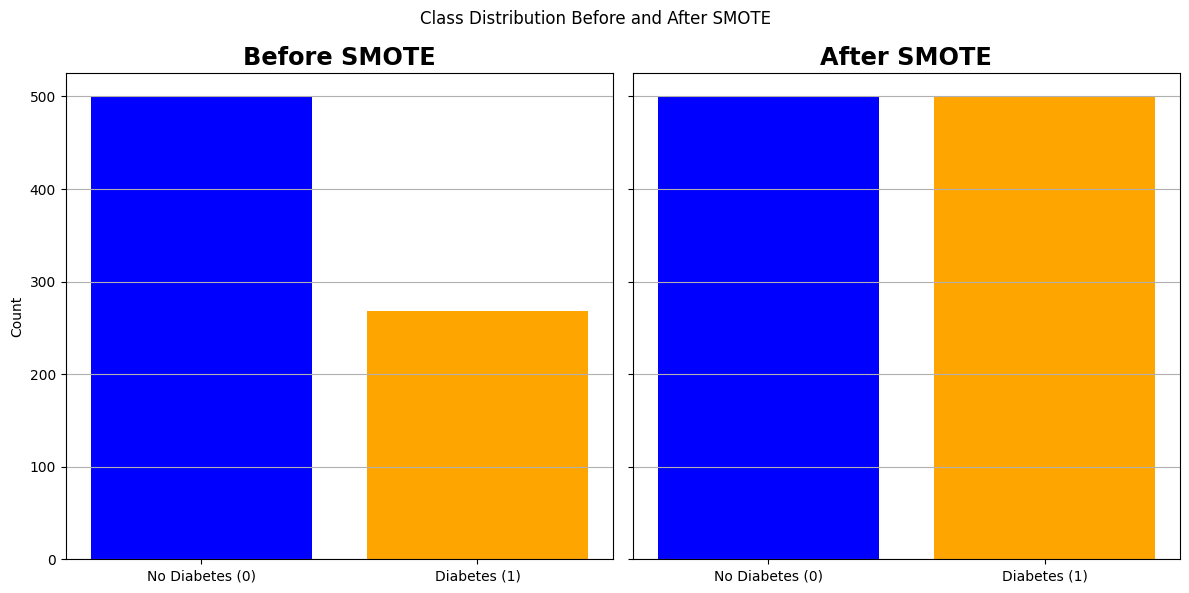

In [ ]:
# Prepare features (X) and target (y)
X = data.drop('Outcome', axis=1) # Features
y = data['Outcome'] # Target

# Check original class distribution
original_class_counts = y.value_counts()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution after SMOTE
resampled_class_counts = pd.Series(y_resampled).value_counts()

# Define consistent colors for classes
class_colors = {0: 'blue', 1: 'orange'}

# Plot class distributions before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Before SMOTE
axes[0].bar(original_class_counts.index, original_class_counts.values, color=[class_colors[cls] for cls in original_class_counts.index])
axes[0].set_title('Before SMOTE')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Diabetes (0)', 'Diabetes (1)'])
axes[0].set_ylabel('Count')
axes[0].grid(axis='y')

# After SMOTE
axes[1].bar(resampled_class_counts.index, resampled_class_counts.values, color=[class_colors[cls] for cls in resampled_class_counts.index])
axes[1].set_title('After SMOTE')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Diabetes (0)', 'Diabetes (1)'])
axes[1].grid(axis='y')

plt.suptitle('Class Distribution Before and After SMOTE')
plt.tight_layout()
plt.show()

- After handling these issues, we standardize the features using **StandardScaler** to ensure all numerical variables are on the same scale, which is particularly important for distance-based models like KNN.

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Display the shape of resampled data
print("Shape after resampling:", X_scaled.shape)

Shape after resampling: (1000, 8)


### **2\. Grid Search for Hyperparameter Tuning**

The goal here is to optimize the performance of three classifiers: **Decision Tree, Logistic Regression, and KNN**. Each model has a set of hyperparameters that control its behavior. For example:

- In Decision Tree, we tune `max_depth` (to prevent overfitting) and `min_samples_split` (to control splitting behavior).
- For Logistic Regression, we tune `C`, the regularization strength, which helps prevent overfitting or underfitting.
- In KNN, we tune `n_neighbors` (number of neighbors to consider), `weights` (whether closer points have more influence), and `metric` (distance metric).
- Gaussian Naive Bayes (GNB) is included but does not require tuning since it has no hyperparameters.

We use **GridSearchCV**, which systematically tries all combinations of hyperparameters using 5-fold cross-validation to find the best configuration for each model.

In [ ]:
# Define models and their parameter grids
param_grids = {
    'decision_tree': {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    },
    'logistic_regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2']  # 'l1' requires specific solvers
    },
    'knn': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Initialize models
models = {
    'decision_tree': DecisionTreeClassifier(random_state=42),
    'logistic_regression': LogisticRegression(solver='lbfgs', max_iter=500, random_state=42),
    'knn': KNeighborsClassifier(),
    'gaussian_naive_bayes': GaussianNB()  # No hyperparameter tuning required
}

# Perform GridSearchCV for models with hyperparameters
best_params = {}
for name, model in models.items():
    if name in param_grids:  # Only perform grid search for tunable models
        grid = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
        grid.fit(X_scaled, y_resampled)
        best_params[name] = grid.best_params_  # Store best parameters
        models[name] = grid.best_estimator_  # Update model with best parameters
    else:
        models[name] = model
    print(f"Best parameters for {name}: {grid.best_params_}")



Best parameters for decision_tree: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best parameters for logistic_regression: {'C': 10, 'penalty': 'l2'}
Best parameters for knn: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best parameters for gaussian_naive_bayes: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### **3\. Evaluation with Cross-Validation**

After identifying the best hyperparameters, we retrain each model and evaluate its performance using 5-fold stratified cross-validation. This approach ensures that the evaluation is robust and accounts for any variability in the data. We compute the following metrics:

- **Accuracy**: The proportion of correct predictions.
- **F1 Score (weighted)**: Balances precision and recall, with weighting to account for class imbalance.
- **AUC-ROC (weighted)**: Measures the ability of the model to distinguish between classes, with weighting for class proportions.

In [ ]:
# Perform 5-fold stratified cross-validation to evaluate models
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []
roc_data = {}

for name, model in models.items():
    accuracies, f1_scores, auc_roc_scores = [], [], []

    for train_idx, test_idx in cv.split(X_scaled, y_resampled):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:, 1]

        accuracies.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        auc_roc_scores.append(roc_auc_score(y_test, y_pred_prob))

        # Store ROC data for plotting
        if name not in roc_data:
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
            roc_data[name] = (fpr, tpr, auc(fpr, tpr))

    # Store results
    results.append({
        'Classifier': name,
        'Accuracy (mean ± std)': f"{np.mean(accuracies):.3f} ± {np.std(accuracies):.3f}",
        'F1 Score (mean ± std)': f"{np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}",
        'AUC-ROC (mean ± std)': f"{np.mean(auc_roc_scores):.3f} ± {np.std(auc_roc_scores):.3f}"
    })

### **4\. ROC Curve Visualization**

ROC curves provide a visual representation of how well each classifier distinguishes between the two classes (diabetes vs. no diabetes). By plotting the true positive rate (sensitivity) against the false positive rate, we can compare the classifiers’ performance.

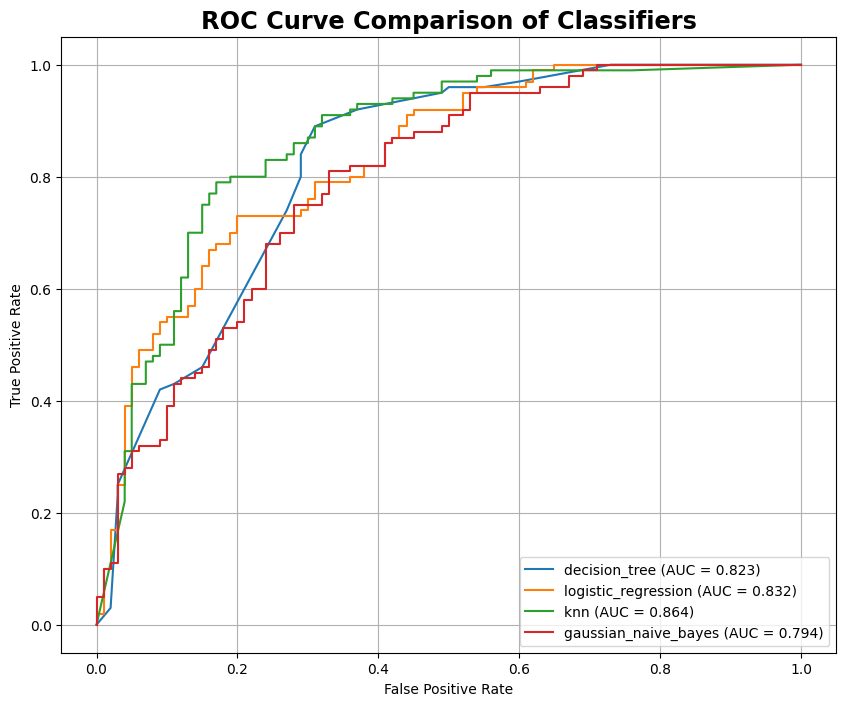

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, auc_score) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

# Add labels and legend
plt.title('ROC Curve Comparison of Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### **5\. Reporting Results**

Finally, we create tables to summarize the evaluation metrics and the best hyperparameters for each model. These tables highlight the performance differences and showcase the impact of hyperparameter tuning.

In [ ]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Set maximum column width to None to show all content
pd.set_option('display.max_colwidth', None)

# Display performance metrics
print("Classifier Performance Metrics:")
display(results_df)

# Display best hyperparameters (if available)
if best_params:
    formatted_best_params = []
    for param in best_params:
        stringified_param =  ", ".join(f"{key}={value}" for key, value in best_params[param].items())
        formatted_best_params.append(
            {
                'Classifier': param,
                'Best Hyperparameters': stringified_param
            }
        )
    best_params_df = pd.DataFrame(formatted_best_params)
    print("\nBest Hyperparameters for Tuned Models:")
    display(best_params_df)


Classifier Performance Metrics:


,Classifier,Accuracy (mean ± std),F1 Score (mean ± std),AUC-ROC (mean ± std)
0,decision_tree,0.760 ± 0.027,0.760 ± 0.026,0.828 ± 0.020
1,logistic_regression,0.742 ± 0.015,0.742 ± 0.015,0.834 ± 0.024
2,knn,0.807 ± 0.041,0.805 ± 0.041,0.882 ± 0.022
3,gaussian_naive_bayes,0.723 ± 0.012,0.722 ± 0.012,0.808 ± 0.028



Best Hyperparameters for Tuned Models:


,Classifier,Best Hyperparameters
0,decision_tree,"max_depth=5, min_samples_leaf=5, min_samples_split=2"
1,logistic_regression,"C=10, penalty=l2"
2,knn,"metric=manhattan, n_neighbors=7, weights=distance"


### Discussion: Performance Differences Between Models

1. **Overall Performance**:
    
    - The KNN classifier outperforms the other models across all metrics, with the highest accuracy (0.807 ± 0.041), F1 score (0.805 ± 0.041), and AUC-ROC (0.882 ± 0.022). This suggests it is well-suited for the dataset, particularly with the selected hyperparameters.
    - The Decision Tree performs moderately well but lags behind KNN in terms of AUC-ROC, indicating it may struggle more with distinguishing between classes.
    - Logistic Regression demonstrates robust and consistent performance, with relatively low variability. Its AUC-ROC (0.834 ± 0.024) indicates it captures the overall separability of the classes effectively, even if its accuracy is slightly lower.
    - Gaussian Naive Bayes is the weakest model across all metrics, likely due to assumptions of feature independence that may not hold in the dataset.
2. **Impact of Hyperparameter Tuning**:
    
    - Hyperparameter tuning significantly boosted performance, especially for the Decision Tree and KNN models.
        - The Decision Tree's constrained depth (max_depth=5) and regularization (min_samples_leaf=5, min_samples_split=2) reduced overfitting, improving its generalization.
        - KNN's optimal hyperparameters (metric=manhattan, n_neighbors=7, weights=distance) improved its ability to adapt to data nuances, especially with weighted distances accounting for class densities.
    - Logistic Regression's tuning (C=10) controlled the strength of regularization, ensuring a balance between bias and variance.
3. **Class Imbalance Handling**:
    
    - The higher AUC-ROC scores for KNN and Logistic Regression suggest they handle class imbalance more effectively, likely due to their ability to optimize decision boundaries or account for density variations.
    - The Decision Tree and Gaussian Naive Bayes might require additional techniques such as sampling adjustments or class weighting to address imbalances better.

### Conclusion

KNN emerges as the best-performing model, benefiting from effective hyperparameter tuning that leveraged its adaptability to the dataset. Logistic Regression is a reliable alternative with strong AUC-ROC and stability, while the Decision Tree shows promise but requires further refinement. Gaussian Naive Bayes performs the weakest, potentially due to dataset characteristics violating its assumptions.